In [42]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jester-data-1.csv to jester-data-1.csv


In [27]:
df = pd.read_csv('jester-data-1.csv')
print(df)

        74  -7.82   8.79  -9.66  -8.16  ...  99.22  -5.63  99.23  99.24  99.25
0      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
1       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
2       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
4      100  -6.17  -3.54   0.44  -8.50  ...  -3.35   0.05  -9.08  -5.05  -3.45
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24977  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24978   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24979   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24980   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24982 rows x 101 columns]


In [28]:
processed_data = df.replace(99.00, np.NaN)
print(processed_data)
print(df.values.max())
print(df.values.min())


          74  -7.82  8.79  -9.66  -8.16  ...  99.22  -5.63  99.23  99.24  99.25
0      100.0   4.08 -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
1       49.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2       48.0    NaN  8.35    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3       91.0   8.50  4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
4      100.0  -6.17 -3.54   0.44  -8.50  ...  -3.35   0.05  -9.08  -5.05  -3.45
...      ...    ...   ...    ...    ...  ...    ...    ...    ...    ...    ...
24977  100.0   0.44  7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24978   91.0   9.13 -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24979   39.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
24980   37.0    NaN   NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
24981   72.0   2.43  2.67  -3.98   4.27  ...    NaN    NaN    NaN    NaN    NaN

[24982 rows x 101 columns]
100.0
-9.95


In [29]:
arr = df.values
print(arr.shape)

(24982, 101)


In [30]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

1835282 (1835282,)


In [31]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [32]:
new_arr, idx = replace(arr, 0.1)


In [33]:
print(new_arr)

[[100.     4.08  -0.29 ...  99.    -4.32   1.07]
 [ 99.    99.    99.   ...  99.    99.    99.  ]
 [ 48.    99.     8.35 ...  99.    99.    99.  ]
 ...
 [ 99.    99.    99.   ...  99.    99.    99.  ]
 [ 37.    99.    99.   ...  99.    99.    99.  ]
 [ 72.     2.43   2.67 ...  99.    99.    99.  ]]


In [34]:
arr[idx[0][0], idx[1][0]]

2.09

In [35]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/user_ratings.csv")

In [36]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [37]:
latent_item_features

array([[0.83464895, 0.72826275],
       [0.07803307, 0.59339717],
       [0.29145228, 0.31111657],
       [0.97941485, 0.66933161],
       [0.52968053, 0.65549032]])

In [38]:
latent_user_preferences

array([[0.90595962, 0.57399158],
       [0.38217915, 0.66505423],
       [0.53163744, 0.02674891],
       [0.85793465, 0.34095527],
       [0.88415955, 0.15939117],
       [0.78324479, 0.1309339 ],
       [0.81739987, 0.15757736],
       [0.04466236, 0.79149583],
       [0.56618728, 0.46936489],
       [0.96537389, 0.82575399]])

In [39]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err

In [40]:
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/500000:	MSE=1.203249
Iteration 10000/500000:	MSE=1.203250
Iteration 20000/500000:	MSE=1.203250
Iteration 30000/500000:	MSE=1.203251
Iteration 40000/500000:	MSE=1.203251
Iteration 50000/500000:	MSE=1.203252
Iteration 60000/500000:	MSE=1.203252
Iteration 70000/500000:	MSE=1.203252
Iteration 80000/500000:	MSE=1.203253
Iteration 90000/500000:	MSE=1.203253
Iteration 100000/500000:	MSE=1.203254
Iteration 110000/500000:	MSE=1.203254
Iteration 120000/500000:	MSE=1.203255
Iteration 130000/500000:	MSE=1.203255
Iteration 140000/500000:	MSE=1.203256
Iteration 150000/500000:	MSE=1.203256
Iteration 160000/500000:	MSE=1.203257
Iteration 170000/500000:	MSE=1.203258
Iteration 180000/500000:	MSE=1.203258
Iteration 190000/500000:	MSE=1.203259
Iteration 200000/500000:	MSE=1.203259
Iteration 210000/500000:	MSE=1.203260
Iteration 220000/500000:	MSE=1.203260
Iteration 230000/500000:	MSE=1.203261
Iteration 240000/500000:	MSE=1.203261
Iteration 250000/500000:	MSE=1.203262
Iteration 260000/500000:	M

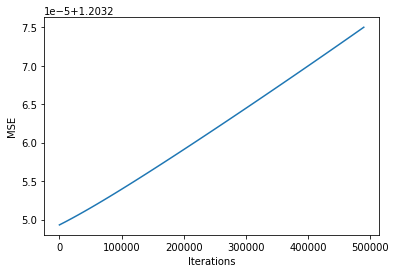

In [44]:
num_iter = 500000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()